In [2]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import CategoricalNB

First let us look at a categorical classification example. 

**Basically, the same example we looked at iin the class.**

In [3]:
X = np.array([['Snow','Overcast','Sunny','Overcast','Overcast','Snow','Overcast', 'Sunny', 'Sunny','Snow','Snow','Overcast','Overcast'],
    ['Yes','No','Yes','Yes','No','No','Yes','Yes','No','No','Yes','Yes','No'],
    ['No','No','No','Yes','Yes','Yes','No','No','Yes','Yes','No','No','Yes']          ])
X = X.T

In [4]:
print(X)

[['Snow' 'Yes' 'No']
 ['Overcast' 'No' 'No']
 ['Sunny' 'Yes' 'No']
 ['Overcast' 'Yes' 'Yes']
 ['Overcast' 'No' 'Yes']
 ['Snow' 'No' 'Yes']
 ['Overcast' 'Yes' 'No']
 ['Sunny' 'Yes' 'No']
 ['Sunny' 'No' 'Yes']
 ['Snow' 'No' 'Yes']
 ['Snow' 'Yes' 'No']
 ['Overcast' 'Yes' 'No']
 ['Overcast' 'No' 'Yes']]


**We will define the target/ground truth column as follows**

In [5]:
y = np.array(['Yes','No','Yes','Yes','Yes','No','No','No','Yes','Yes','No','No','Yes'])

In [6]:
y

array(['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes'], dtype='<U3')

**We will use a label encoder to encode categorical attributes**

In [7]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()

**Let's transform these categorical attributes to integer labels**

In [8]:
X1 = le1.fit_transform(X[:,0])
X2 = le2.fit_transform(X[:,1])
X3 = le3.fit_transform(X[:,2])

**Now let us cretate the new encoded data set**

In [9]:
X = np.array([X1, X2, X3])
X = X.T

In [10]:
X.shape

(13, 3)

In [11]:
print(X)

[[1 1 0]
 [0 0 0]
 [2 1 0]
 [0 1 1]
 [0 0 1]
 [1 0 1]
 [0 1 0]
 [2 1 0]
 [2 0 1]
 [1 0 1]
 [1 1 0]
 [0 1 0]
 [0 0 1]]


Let's encode the target column as well**

In [12]:
yle = preprocessing.LabelEncoder()
y = yle.fit_transform(y)

In [13]:
y

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [14]:
yle.classes_

array(['No', 'Yes'], dtype='<U3')

In [15]:
le1.classes_

array(['Overcast', 'Snow', 'Sunny'], dtype='<U8')

In [16]:
le2.classes_

array(['No', 'Yes'], dtype='<U8')

In [17]:
le3.classes_

array(['No', 'Yes'], dtype='<U8')

**Now remember what we discussed in the lecture, we need to divide the training dataset into two sets to train and evaluate**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Good thing is we don't have to write code to randomly divide the training dataset, there is a library function that does this for you**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [20]:
X_train.shape

(10, 3)

In [21]:
X_test.shape

(3, 3)

In [22]:
y_test

array([1, 1, 0])

**Now let us use the Categorical Naive Bayes object for classification**

In [23]:
cNB = CategoricalNB()

In [24]:
cNB.fit(X_train, y_train)

CategoricalNB()

**In order to a prediction we need a new data instance.**

**Let's create one**

In [25]:
x = np.array([2,1,0]) # x = ["sunny", "yes", "no"]

In [26]:
print(cNB.predict(x.reshape(1,-1))) # need to be array of arrays

[0]


**If you need to get the original categorical attribute value corresponding to the predicted integer: do the following**

In [27]:
yle.inverse_transform(cNB.predict(x.reshape(1,-1)))

array(['No'], dtype='<U3')

**Now let us use the test data points to get a prediction**

In [28]:
X_test

array([[0, 1, 1],
       [0, 0, 1],
       [0, 1, 0]])

In [29]:
predictions = cNB.predict(X_test)

In [30]:
print(predictions)

[0 1 0]


In [31]:
yle.inverse_transform(predictions)

array(['No', 'Yes', 'No'], dtype='<U3')

In [32]:
print(y_test)

[1 1 0]


In [33]:
yle.inverse_transform(y_test)

array(['Yes', 'Yes', 'No'], dtype='<U3')

**Now let's evaluate the prediction**

In [34]:
from sklearn.metrics import accuracy_score

**First, let's look at the accuracy score**

In [35]:
print(f'Accuracy score is {accuracy_score(y_test, predictions)}')

Accuracy score is 0.6666666666666666


In [36]:
print(f'Error rate is {1-accuracy_score(y_test, predictions)}')

Error rate is 0.33333333333333337


**Makes sense as only two of the entries were predicted correctly**

**We can use the f-score, precision and recall that we learnt in the class as well**

In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [38]:
print(f'F-score is {f1_score(y_test, predictions, average='weighted')}')

F-score is 0.6666666666666666


In [39]:
print(f'Precision is {precision_score(y_test, predictions, average=None)}') # Compute the precision.

Precision is [0.5 1. ]


In [40]:
print(f'Recall is {recall_score(y_test, predictions, average=None)}') #Compute the Recall

Recall is [1.  0.5]


In [41]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average=None) #Compute precision, recall, F-measure and support for each class.

(array([0.5, 1. ]),
 array([1. , 0.5]),
 array([0.66666667, 0.66666667]),
 array([1, 2]))

**Now that we know how to do classification, let's look at slightly harder set of problems**

**In fact let's use a dataset with numerical attributes to make it more interesting**

**Let's generate a dataset**

In [42]:
from sklearn.datasets import make_classification

**This is how you would generate the dataset**

In [43]:
data, target = make_classification(n_features=6, n_classes=3, n_samples=800, n_informative=2, random_state=1, n_clusters_per_class=1)

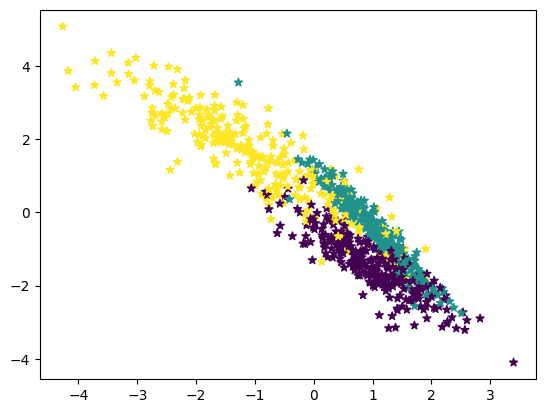

In [44]:
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c=target, marker="*");

**Let's divide the dataset--we looked at how to do this earlier**

In [45]:
data_train, data_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=125)

In [46]:
from sklearn.naive_bayes import GaussianNB

# the model
gnb = GaussianNB()

# train the model
gnb.fit(data_train, y_train)

GaussianNB()

**Let's try to predict one data instance**

In [47]:
predicted = gnb.predict([data_test[2]])
predicted

array([2])

In [48]:
print("Actual Value:", y_test[2])
print("Predicted Value:", predicted[0])

Actual Value: 2
Predicted Value: 2


**Looks good for this value**


**Let's try to predic all values for test data instances**

In [49]:
y_pred = gnb.predict(data_test)

In [50]:
print("Actual Value:", y_test)
print("Predicted Value:", y_pred)

Actual Value: [0 1 2 1 1 1 0 0 1 1 0 0 0 2 2 1 1 0 0 0 0 0 2 0 2 2 0 2 0 2 1 0 0 0 1 0 2
 2 1 1 2 1 2 0 1 0 2 1 0 1 2 1 2 1 0 1 1 1 0 1 0 1 2 0 2 1 0 1 2 1 0 2 2 1
 1 1 2 1 0 0 1 2 0 0 0 0 0 0 2 2 1 1 0 1 1 2 0 1 1 2 1 1 0 1 1 0 2 2 2 0 1
 2 2 1 2 2 1 2 0 2 2 1 1 2 0 1 0 1 2 1 2 1 2 2 2 1 2 1 1 2 0 0 0 1 1 1 0 2
 2 0 1 1 1 1 0 1 2 1 2 0]
Predicted Value: [0 1 2 0 1 1 0 0 1 1 0 0 0 2 2 1 1 0 0 0 0 0 1 0 0 2 0 2 0 2 1 2 0 0 1 0 2
 2 1 0 2 1 2 0 1 0 1 1 0 1 2 2 0 1 0 1 0 1 0 1 0 1 2 0 2 1 0 1 2 1 0 1 2 1
 1 0 2 1 0 2 1 2 0 0 0 0 0 0 2 2 1 1 0 1 1 2 0 0 1 2 1 1 0 1 1 1 2 1 2 0 1
 2 2 1 1 2 1 2 0 2 2 1 2 2 0 1 0 1 0 1 2 1 1 2 2 1 1 0 1 2 0 0 0 1 1 1 0 2
 2 0 0 1 1 1 0 1 2 1 2 0]


In [51]:
print(f'Accuracy score is {accuracy_score(y_test, y_pred)}')
print(f'Error rate is {1-accuracy_score(y_test, y_pred)}')
print(f'F-score is {f1_score(y_test, y_pred, average=None)}')
print(f'Precision is {precision_score(y_test, y_pred, average=None)}') # Compute the precision.
print(f'Recall is {recall_score(y_test, y_pred, average=None)}') #Compute the Recall
print(precision_recall_fscore_support(y_test, y_pred, average=None)) #Compute precision, recall, F-measure and support for each class.
# The support is the number of occurrences of each class in y_true.

Accuracy score is 0.8625
Error rate is 0.13749999999999996
F-score is [0.87850467 0.86178862 0.84444444]
Precision is [0.8245614  0.86885246 0.9047619 ]
Recall is [0.94       0.85483871 0.79166667]
(array([0.8245614 , 0.86885246, 0.9047619 ]), array([0.94      , 0.85483871, 0.79166667]), array([0.87850467, 0.86178862, 0.84444444]), array([50, 62, 48]))


**Let's look at some nice visualizations**

[[47  1  2]
 [ 7 53  2]
 [ 3  7 38]]


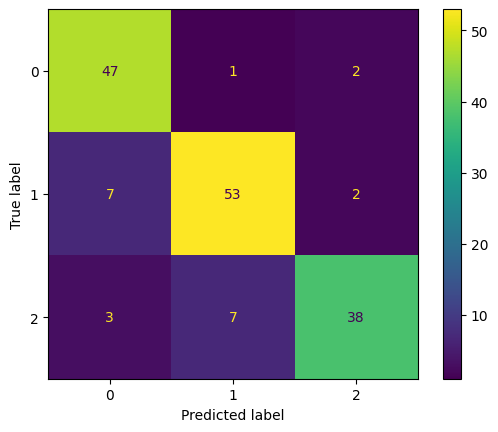

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

**Let's do classification on another dataset--I got this dataset from kaggle.com**

**This dataset contains piblically available data from LendingClub.com.**

In [53]:
import pandas as pd

df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Let's look at the dataset

In [54]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB



- **The dataset consists of 14 columns and 9578 rows.**
- **Apart from “purpose”, columns are either floats or integers.**
- **Our target column is “not.fully.paid”.**

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

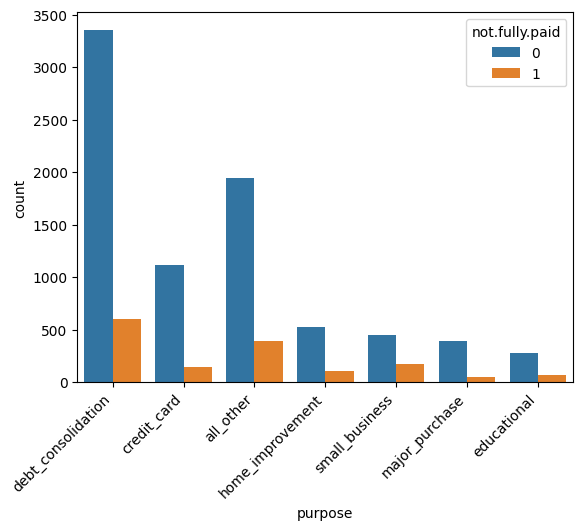

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');

In [57]:
pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
pre_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


**Now let's split the dataset into training and testing**

In [58]:
X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)

**We are going to use the Gaussian Naive Bayes**

In [60]:
gnb_loan = GaussianNB()

**Training the model**

In [61]:
gnb_loan.fit(X_train, y_train)

GaussianNB()

**Let's evaluate the model**

In [62]:
from sklearn.metrics import classification_report

y_pred_loan = gnb_loan.predict(X_test)

**Let's look at the evaluation scores**

In [63]:
print(f'Accuracy score is {accuracy_score(y_test, y_pred_loan)}')
print(f'Error rate is {1-accuracy_score(y_test, y_pred_loan)}')
print(f'F-score is {f1_score(y_test, y_pred_loan, average=None)}')
print(f'F-score is {f1_score(y_test, y_pred_loan, average="weighted")}')
print(f'Precision is {precision_score(y_test, y_pred_loan, average=None)}') # Compute the precision.
print(f'Recall is {recall_score(y_test, y_pred_loan, average=None)}') #Compute the Recall
print(precision_recall_fscore_support(y_test, y_pred_loan, average=None)) #Compute precision, recall, F-measure and support for each class.

Accuracy score is 0.8235908141962421
Error rate is 0.17640918580375786
F-score is [0.90157251 0.15075377]
F-score is 0.7773504115453751
Precision is [0.84359673 0.37037037]
Recall is [0.96810507 0.09463722]
(array([0.84359673, 0.37037037]), array([0.96810507, 0.09463722]), array([0.90157251, 0.15075377]), array([1599,  317]))


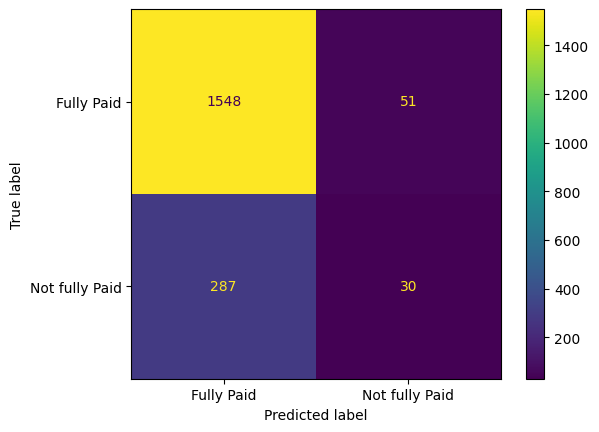

In [64]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred_loan)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [65]:
print(classification_report(y_test, y_pred_loan))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1599
           1       0.37      0.09      0.15       317

    accuracy                           0.82      1916
   macro avg       0.61      0.53      0.53      1916
weighted avg       0.77      0.82      0.78      1916



In [66]:
y_train.info()
print(y_train.value_counts())

<class 'pandas.core.series.Series'>
Index: 7662 entries, 8367 to 3005
Series name: not.fully.paid
Non-Null Count  Dtype
--------------  -----
7662 non-null   int64
dtypes: int64(1)
memory usage: 119.7 KB
not.fully.paid
0    6446
1    1216
Name: count, dtype: int64


**Exercise: Do K-Fold here**

In [67]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits = 20, shuffle=True, random_state=42)
scores_loan = cross_val_score(gnb_loan, X, y, cv=kf, scoring='accuracy')

print(f'Cross validation score : {scores_loan}')
print(f'Mean : {np.mean(scores_loan)}')
print(f'SD : {np.std(scores_loan)}')

Cross validation score : [0.82881002 0.83716075 0.7954071  0.80584551 0.81837161 0.80793319
 0.85386221 0.83507307 0.8308977  0.81837161 0.82254697 0.84759916
 0.81002088 0.82463466 0.81628392 0.80167015 0.81210856 0.82045929
 0.81589958 0.82426778]
Mean : 0.8213611865724444
SD : 0.01435322165290933


**Let's try the IRIS dataset**

In [68]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [70]:
# model
gnb_iris = GaussianNB()

# Train the model
gnb_iris.fit(X_train, y_train)

GaussianNB()

In [71]:
y_pred_iris = gnb_iris.predict(X_test)
y_pred_iris

array([0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 0, 1, 2, 0, 1, 0, 0])

In [72]:
print(f'Accuracy score is {accuracy_score(y_test, y_pred_iris)}')
print(f'Error rate is {1-accuracy_score(y_test, y_pred_iris)}')
print(f'F-score is {f1_score(y_test, y_pred_iris, average=None)}')
print(f'F-score is {f1_score(y_test, y_pred_iris, average="weighted")}')
print(f'Precision is {precision_score(y_test, y_pred_iris, average=None)}') # Compute the precision.
print(f'Recall is {recall_score(y_test, y_pred_iris, average=None)}') #Compute the Recall
print(precision_recall_fscore_support(y_test, y_pred_iris, average=None)) #Compute precision, recall, F-measure and support for each class.

Accuracy score is 0.9666666666666667
Error rate is 0.033333333333333326
F-score is [1.         0.95652174 0.95238095]
F-score is 0.9665976535541752
Precision is [1.         0.91666667 1.        ]
Recall is [1.         1.         0.90909091]
(array([1.        , 0.91666667, 1.        ]), array([1.        , 1.        , 0.90909091]), array([1.        , 0.95652174, 0.95238095]), array([ 8, 11, 11]))


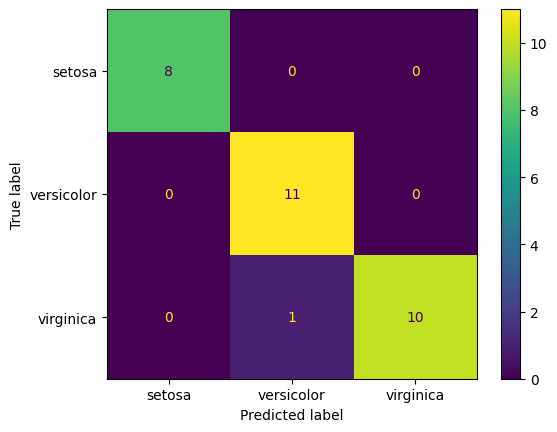

In [73]:
labels = iris.target_names
cm = confusion_matrix(y_test, y_pred_iris)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [74]:
print(classification_report(y_test, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Non parametric approach--K-nearest neighbor**

In [75]:
# k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust k
# X_train, X_test, y_train, y_test 
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)

k-Nearest Neighbors Accuracy: 1.0


**Let's do a K-cross validation example as well**

In [76]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# model
gnb_iris = GaussianNB()

# Create a KFold object
kf = KFold(n_splits=9, shuffle=True, random_state=42)  # Adjust n_splits as needed

# Perform k-fold cross-validation
scores = cross_val_score(gnb_iris, iris.data, iris.target, cv=kf, scoring='accuracy')

In [77]:
# Print the scores for each fold
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Cross-validation scores: [1.         1.         0.94117647 1.         0.94117647 0.88235294
 1.         1.         0.875     ]
Mean accuracy: 0.959967320261438
Standard deviation: 0.04939940018899012


In [80]:
x1 = np.array([1,-1,1,3])
x2 = np.array([-1,1,0,3])
from numpy import linalg as LA
print(LA.norm(x1-x2, 4))
print(LA.norm(x1-x2, 1))

2.39678172692843
5.0


In [79]:
y3 = np.array([13.8,7.7,1.2])
y4 = np.array([4.6,2.1,9.1])
print(np.dot(y3, y4))
print(np.dot(y3, y4)/(LA.norm(y3, 2)*LA.norm(y4, 2)))

90.57000000000001
0.5489413064926192
